<a href="https://colab.research.google.com/github/svarunkishore/Adaptive_Cyber_Defence_System/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
dataset_df = pd.read_csv('/content/new_dataset11.csv')
Y = dataset_df['Encoded_Target']
X = dataset_df.drop(['Encoded_Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        21
           1       0.88      0.97      0.92        79

    accuracy                           0.87       100
   macro avg       0.85      0.73      0.76       100
weighted avg       0.87      0.87      0.86       100



In [ ]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

      benign       0.70      0.54      0.61        13
      malign       0.93      0.97      0.95        87

    accuracy                           0.91       100
   macro avg       0.82      0.75      0.78       100
weighted avg       0.90      0.91      0.90       100



In [ ]:
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

      benign       0.50      0.06      0.10        18
      malign       0.83      0.99      0.90        82

    accuracy                           0.82       100
   macro avg       0.66      0.52      0.50       100
weighted avg       0.77      0.82      0.76       100



In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.6 MB/s eta 0:00:00


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.899 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.873 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

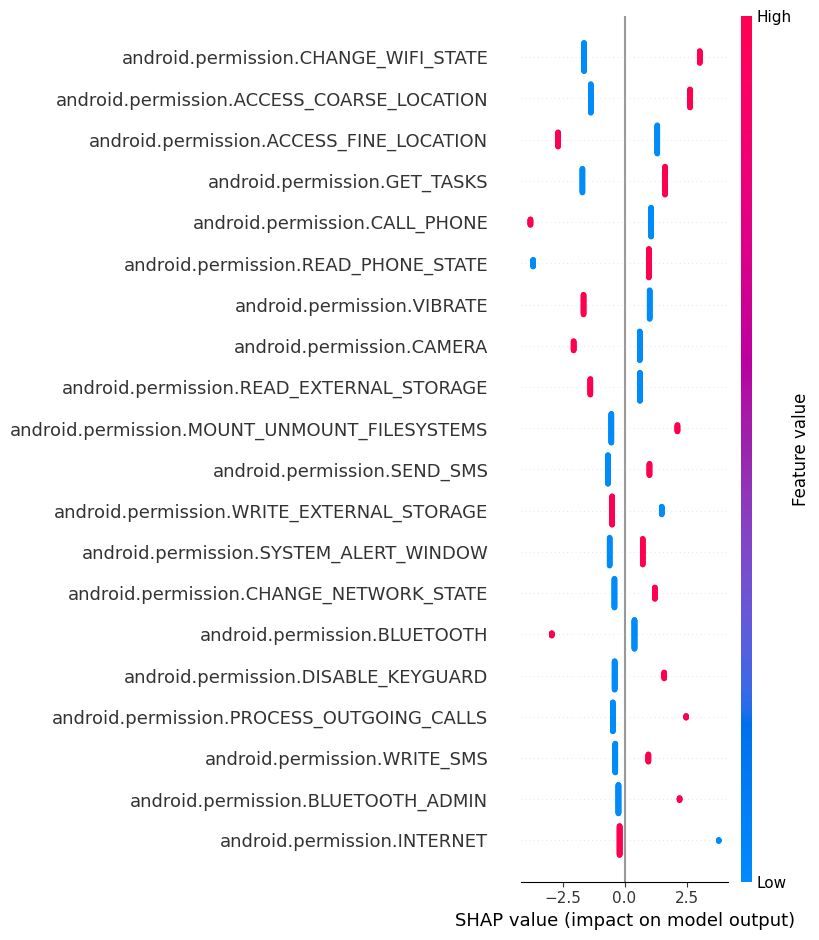

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import shap
import numpy as np

# Load your dataset
dataset_df = pd.read_csv('/content/DataSet (1).csv')
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear']  # Make sure your model is a linear kernel SVM
}

# Perform GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions with the best model
grid_predictions = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_predictions))

# Create a LinearExplainer for the best model (for linear kernel SVM)
explainer = shap.LinearExplainer(grid.best_estimator_, X_train)

# Generate SHAP values for your model
shap_values = explainer.shap_values(X_test)

# You can visualize the SHAP values or perform other analyses as needed
shap.summary_plot(shap_values, X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.850 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.850 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


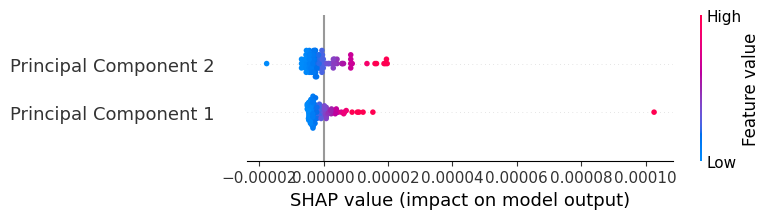

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import shap
import numpy as np

# Load your dataset
dataset_df = pd.read_csv('/content/new_dataset.csv')
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear']  # Make sure your model is a linear kernel SVM
}

# Perform GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions with the best model
grid_predictions = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_predictions))

# Create a LinearExplainer for the best model (for linear kernel SVM)
explainer = shap.LinearExplainer(grid.best_estimator_, X_train)

# Generate SHAP values for your model
shap_values = explainer.shap_values(X_test)

# You can visualize the SHAP values or perform other analyses as needed
shap.summary_plot(shap_values, X_test)
